## Observations and Insights 

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice.
total_mice = len(combined_mice_df["Mouse ID"].unique())
print(f" There are {total_mice} mice")

 There are 249 mice


In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = combined_mice_df[combined_mice_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_df["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [110]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drops all rows for mouse id g989
dup_mice_index = combined_mice_df[combined_mice_df["Mouse ID"] == "g989"].index
combined_mice_df = combined_mice_df.drop(dup_mice_index, inplace=False)


# Rename df to "mice_df" because I'm too lazy to type out the whole thing
mice_df = combined_mice_df
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(mice_df["Mouse ID"].unique())
print(f" There are {total_mice} mice")

 There are 248 mice


## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create dataset grouped by drug, then template for final dataframe
drug_data = mice_df.groupby(["Drug Regimen"])
dstats_df = drug_data.count()

# Drop unnecessary columns
dstats_df = dstats_df.drop(["Mouse ID", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"], axis=1)

# Calculate needed statistic
dstats_df["Mean Tumor Volume (mm3)"] = round(drug_data["Tumor Volume (mm3)"].mean(), 3)
dstats_df["Median Tumor Volume (mm3)"] = round(drug_data["Tumor Volume (mm3)"].median(), 3)
dstats_df["Variance of Tumor Volume (mm3)"] = round(drug_data["Tumor Volume (mm3)"].var(), 3)
dstats_df["Standard Deviation of Tumor Volume (mm3)"] = round(drug_data["Tumor Volume (mm3)"].std(), 3)
dstats_df["Standard Error of Mean of Tumor Volume (mm3)"] = round(drug_data["Tumor Volume (mm3)"].sem(), 3)


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dstats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [114]:
# Makes the same summary statistics, but in one line
dstats2_df = round(mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean Tumor Volume (mm3)", "median": "Median Tumor Volume (mm3)", "var": "Variance of Tumor Volume (mm3)", "std": "Standard Deviation of Tumor Volume (mm3)", "sem": "Standard Error of Mean of Tumor Volume (mm3)"}), 3) 
dstats2_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

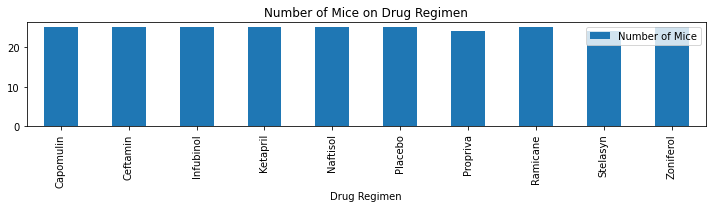

In [131]:
# Create df of unique mice and drug used
mice_count = mice_df.groupby(["Drug Regimen"]).nunique()
mice_count = mice_count.drop(["Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"], axis=1)
mice_count = mice_count.rename(columns={"Mouse ID": "Number of Mice"})

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count.plot(kind="bar", figsize=(10,3), title="Number of Mice on Drug Regimen")
plt.tight_layout()
plt.show()

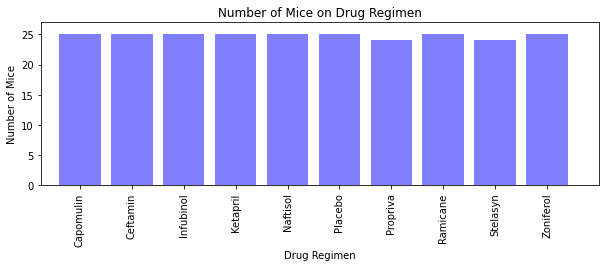

In [130]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create x axis and ticks
x_axis = np.arange(len(mice_count))
tick_locations = [value for value in x_axis]

# Create plot and edit paramters
plt.figure(figsize=(10,3))
plt.bar(x_axis, mice_count["Number of Mice"], color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, mice_count.index, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_count["Number of Mice"])+2)
plt.title("Number of Mice on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
